# Maskininlärning  

## Data Engineering  

Amazon som började med detta. Måste samla in data, preppa datan osv men en DE gör många masininlärningsgrejer och kör alla steg ofta för att det ska vara tillgängligt och funktionellt för en data scientist senare.  

”Skriv inte i punkter för det gör en AI, då kan vi bli ersatta – gör i stället saker som en AI inte kan, bryt mönster.”  
- pr0fez

En DE ställer sig en del frågor: vilken data är tillgänglig, hur hämtar vi den, göra den tillgänglig, backups etc. En av de största frågorna är om det ens är lagligt. Mycket data är personuppgifter i dag vilket vi verkligen måste ta i beaktning. Då måste en DE göra massa saker för att kunna samla data. Vanligtvis så gör vi som så att vi anonymiserar data (med en kryptografisk algoritm) eller i användaravtalet säga att användaren ger tillåtelse att lämna över personuppgifter. Rent generellt får du hantera information men inte spara den enligt personuppgiftslagen. Det är brottsligt och företag kan gå under, näringsförbud etc. I Sverige kan du däremot inte avsäga dig dina rättigheter vilket är en väldigt viktig bit i svensk lagstiftning. Vi kommer återvända ofta till detta.  

Feature engineering (nästa steg efter DE) så att vi kan manipulera, räkna om data mm så att vi kan hitta mönster i data. Vi  kan inte bara räkna med att en algoritm ska kunna hitta mönster i data bara sådär. T ex labben vi gjorde, du kommer inte över 60 % i R² med bara rådata medan processad kod så kom vi upp i 99,7 %. Våra distributioner måste återspegla våra antaganden. Vi kommer återkomma till detta.  

Model fitting är nästa steg där vi gör någon sorts träningssteg. Det är vad denna kursen i mångt och mycket kommer att handla om. Evaluate och sedan deployment. Dessa steg (från början) kommer vi att återupprepa mycket.  

Vi kallar detta offline training, det innebär att vi kommer träna och sen köra. Då händer inget mer med modellen. Det kommer vara fokus på denna kursen tillsammans med supervised learning.  

## Statistik  

$ SSE = \sum^n_{i=1} (y_i - \hat{y})^2 $  

Vi tränar ofta på ett stort stickprov och gör förutsägelser på ett väldigt litet stickprov. Ju större stickprovet är desto större blir vår SSE, den bara ökar. Hur mäter vi då? Därför ska vi byta till MSE.  

$ MSE = \frac{1}{n} \sum^n_{i=1} (y_i - \hat{y})^2 $  

Oavsett om vi har n eller n-1 så kommer denna inte vara rättvis men det är tillräckligt för oss. Vi vill kunna ge upp antagandet om att det kommer från samma population. MSE (standardavvikelsen i variansen) är därför ett bättre värde, inte rent matematiskt men vi måste använda det för att kunna jämföra värdena. När n går mot oändligheten så går MSE mot noll. Men det är bara sant omm SSE is begränsad (”bounded”). Om felet bara fortsätter växa (tänk en kvadratisk kurva där vi dragit en linje). Vi kan alltså inte uppskatta x² linjärt, oavsett hur mycket data vi har.   

$ RMSE = \sqrt{MSE} $  

Standardavvikelsen i medlet. Då kan vi säga: vi förväntar oss att det kommer vara inom fem grader osv. Vi har ingen ”unbiased” uppfattning av SE(µ)  så vad vi tar är RMSE på valideringsset. Korsvalidering kommer vi ta medlet av alla RMSE.    

$  $  

RSE är standardavvikelsen i standardfelet. Lack of fit, ju högre denna är desto tydligare är det att modlellen inte har en bra förklaringsgrad. Tänk att feltermen påpekar att vi har för få parametrar i vår modell, t ex. Då kan vi till exempel kolla på interaktionerseffekter och feature engineering för att få till en bättre modell. RSE är rättvis om Y~Z. Tyvärr hjälper detta oss inte eftersom den är ”lack of fit” om vi inte har ett väldigt stort set. Transfer learning (att använda modellen på annan population) går däremot inte.  

Kolinjaritet är enbart matematiskt relevant för signifikanstester. Enligt webben så finns det många idéer om denna och det är inte matematiskt välgrundat. Det enda detta konceptet gör är att säga att vi inte längre kan lita på signifikanstesterna. Hierarkiprincipen. När vi gör en interaktionseffekt så gör vi en kolinjaritet. Så står det även på Wikipedia. ”Om du har kolinljaritet så kan du inte lita på signifikanstesterna” då den inte längre har en t distribution.  

# Lecture_code / L0-Linear_regression  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0)
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Med den kunskap vi har från förra kursen så ser vi redan här hur datan är fördelad. Om vi tittar på maxvärdet, vilket värde som 75, 50, och 25 % av datan är mindre än så ser vi att alla utom Newspaper har någon form av normaldistribution.  

In [2]:
X, y = df["TV"], df["Sales"]

beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1 * x

Varför vi skriver ett litet y är för att vi tittar bara på stickprovet och inte alla möjligaa ... . Varför då inte litet X? Nja, ingen vanlig konvention.  

Nämnvärt här är att polyfit returnerar våra parametrar från höger till vänster i stället för vad vi är vana vid.  

Lambda här är en **closure**, den stänger över uttryck i omgivningen. [#TODO KOLLA UPP EN BÄTTRE DEFINITION]  

Intercept beta_0 hat: 7.0326  
Slope beta_1 hat: 0.0475  

Vad ovan säger är att utan reklam så säljs ändå ca 7000 exemplar och med reklam säljer vi ca 47 enheter mer än vanligt.  

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

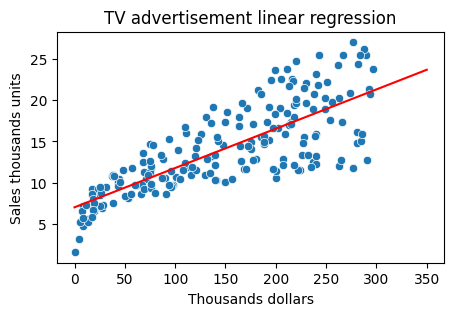

In [3]:
print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")  # spend $1000 gives 47.5 extra sold units

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)

Här har vi exemplet som vi pratade om tidigare i dag. SSE kommer bara växa ju mer data vi har.  

<Axes: xlabel='TV', ylabel='Sales'>

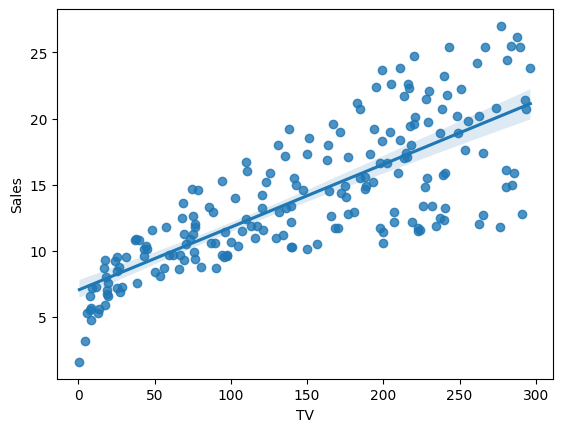

In [4]:
sns.regplot(x=X, y=y)

Om vi väljer för hög konfidensnivå på vårt konfidensintervall så betyder detta inte längre någonting eftersom konfidensintervallet absolut inte täcker 95 % (ci=95, standard för regplot) av datan - vilket vi kan se (det suddiga blå fältet kring linjen). Vi har för liten förklaringsgrad här för att kunna påverka det här, även om vi skulle ändra konfidensnivån.  

In [13]:
from sklearn.linear_model import LinearRegression

X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(f"R²: {model.score(X, y):.3f}")

[ 0.          0.04576465  0.18853002 -0.00103749]
R²: 0.897


Inom maskininlärning kämpar vi hela tiden med overfit. Vi har lärt oss att klassificera punkterna perfekt men allt utanför är lost.  

Om du ska skilja på train, val och test så särskilj test från allt annat redan när du läser in datan.  

All vår feature engineering kommer resultera i X_train vilket är vår feature ... .  

Vår model är inte stabil vilket vi kan se i att RSE är av samma storleksordning som RMSE.  

# Lunch  

## Lecture_code / Polynomial_regression

I förra labben hade vi en fysikaliskt sätt att linjarisera. Nu ska vi använda polynom. Polynomiell regression använder samma X överallt. Alltså en variabel men många features. Vi gör alla interaktionseffekter med sig själv.  

Funktionerna är ju inte linjärt men hela polynomet självt är linjärt. Radoperationerna är fortfarande linjära så vi kan t ex göra Gauss-eliminering.  

När vi har en multipel regression så uppskattar vi en linje för varje parameter men hittar ett medel av dem. Det är samma sak med polynomial. Men vi kan inte använda kategorisk data i polynomial regression, då hade vi behövt allmän regression.  

In [ ]:
def ground_truth(x):
    return np.square(x) + .5*x + 3

I vanliga fall så har vi såklart inte sanningen så här hittar vi bara på något.  

Först gör vi om vår indata till polynom och sedan kör vi en regression på den. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_features[:4], X[:4], np.square(X[:4])

(array([[-1.4108856 ,  1.99059817],
        [-2.21382897,  4.90103869],
        [-1.23160635,  1.51685419],
        [-1.42907061,  2.0422428 ]]),
 array([[-1.4108856 ],
        [-2.21382897],
        [-1.23160635],
        [-1.42907061]]),
 array([[1.99059817],
        [4.90103869],
        [1.51685419],
        [2.0422428 ]]))

Vi transformerar matrisen och får både originalvärde och det nya värdet som i detta fallet är kvadraten av värdet eftersom vi valde degree=2.  

Vi kan inte räkna ut vilken grad någon polynomial regression ska ha, vi måste helt enkelt testa oss fram. Det vanligaste är att göra en grid search, testa alla värden inom ett intervall. Det finns så klart färdiga metoder men vi kommer köra det manuellt till en början.  

Ju färre parametrar, desto bättre predictions. 

In [ ]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

På plotten över RMSE så vill vi ha så lågt värde som möjligt i båda axlar. - 

Beroende på vilket stickprov vi kör på så får vi väldigt olika resultat. Därför måste vi köra många gånger och helst på stora stickprov. Sen tar vi något medel därifrån. OLS har ofta hög varians och tenderar att ha lägre bias. För linjär regression så överdriver vi felen - i våra polynom så är de exponenter och felen blir ju också exponentiella. Därav får vi väldigt stor varians i polynomial regression.  

I allmänhet letar vi efter ett "knee" (knä) där grafen börjar gå ner igen.  

Om vi misstänker att det är polynom vi har att göra med så ska vi använda polynomial regression. Om vi misstänker att en interaktionsterm har en interaktion med sig själv så är det ett polynom. 

Har vi hög bias så bryr vi oss inte om den riktiga data, vi har förskjutit långt bort från nollan. Då tenderar det att vara en förenklad modell och har en underfit. Ser vi underfit så har vi biasproblem.  

Har vi hög varians tenderar vi att göra overfit, många frihetsgrader. Vi hittar allså ickesamband.  

Hög komplexitet är låg bias och hög varians. Låg komplexitet är motsatsen. Eftersom vi har svårt att minska bias. Vi måste alltså hitta en balans. 

# Fredag  

Uppgift 0-2 är lämpligt att göra på fredag. Fredagar kommer vara repetition 